In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

Current folders are:
PlannerPropTest.0
PlannerPropTest.1
PlannerPropTest.2
PlannerPropTest.3


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
names=["inv goods bought", "inv goods inventories", "grossInvQ", "grossInvQ*price","grossInvExpected (value)"]

In [4]:
os.chdir("../"+folder+".0")
#planner info database from rank==0
plannerInfo=pd.read_csv('plannerInfo.csv', header=None)
#print(plannerInfo)
#planner info database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    plannerInfo=plannerInfo.add(pd.read_csv('plannerInfo.csv', header=None))
plannerInfo.columns=names
pd.DataFrame(plannerInfo)

,inv goods bought,inv goods inventories,grossInvQ,grossInvQ*price,grossInvExpected (value)
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,56.824276,62.088889,0.000000,0.000000,0.000000
5,11.912108,13.025724,0.000000,0.000000,0.000000
6,21.023337,24.396949,0.000000,0.000000,1182.265242
7,27.689749,34.418057,121.865565,1182.265242,1536.746194
8,33.424022,37.772753,158.404762,1536.746194,716.420170
9,17.571739,19.870953,73.847176,716.420170,1001.311292


old 78.402871,96.868367,14.122038,137.003382


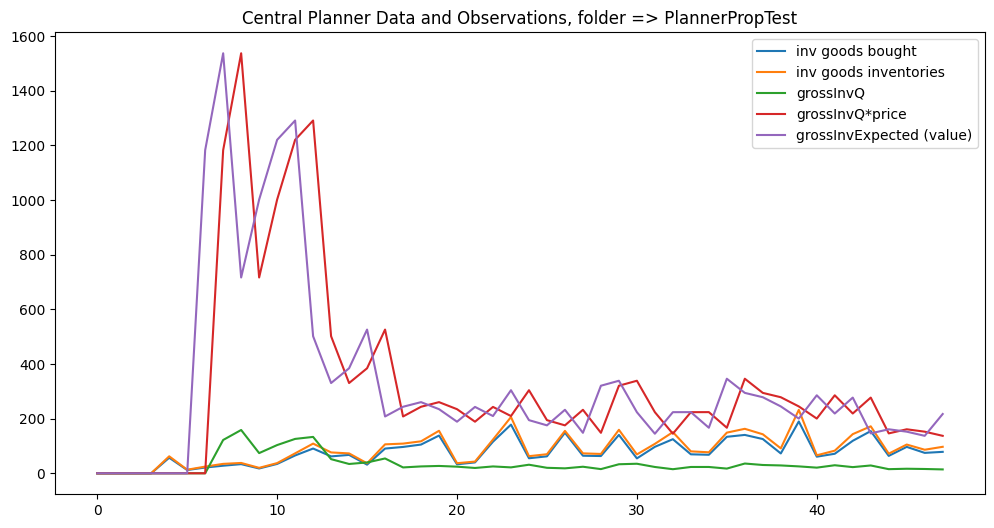

In [5]:
fig=plannerInfo.plot(figsize=(12,6), title="Central Planner Data and Observations, folder => " + folder)
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_centralPlannerPlot.jpg",dpi=180)
